# Introduction to Neural Networks:

## Author: [Dr. Rahul Remanan](http://remananr.com/Blog/)
### CEO and Chief Imagination Officer
###[ Moad Computer](https://www.moad.computer)

This is a hands-on workshop notebook on deep-learning using python 3. In this notebook, we will learn how to implement a neural network from scratch using numpy. Once we have implemented this network, we will visualize the predictions generated by the neural network and compare it with a logistic regression model, in the form of classification boundaries. This workshop aims to provide an intuitive understanding of neural networks.

In practical code development, there is seldom an use case for building a neural network from scratch. Neural networks in real-world are typically implemented using a deep-learning framework such as tensorflow. But, building a neural network with very minimal dependencies helps one gain an understanding of how neural networks work. This understanding is essential to designing effective neural network models. A the end of the session, we will use tensorflow deep-learning library to build a neural network. 



### Architecture of the basic XOR gate neural network:

![Artificial neural network architecture](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/Artificial_neural_network.png)

### XOR gate problem and neural networks -- Backgorund:

Part 1 of this notebook explains how to build a very basic neural network in numpy. This network is trained to predict the output of a [XOR gate](https://en.wikipedia.org/wiki/XOR_gate). This notebook is a fork of the [neural network implementation in numpy by Milo Harper](https://github.com/miloharper/simple-neural-network).

![CMOS XOR Gate](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/CMOS_XOR_Gate.png)

[The XOR gate is an interesting problem in neural networks](http://www.ece.utep.edu/research/webfuzzy/docs/kk-thesis/kk-thesis-html/node19.html). [Marvin Minsky](https://en.wikipedia.org/wiki/Marvin_Minsky) and [Samuel Papert](https://en.wikipedia.org/wiki/Seymour_Papert) in their book [ 'Perceptrons' (1969)](https://en.wikipedia.org/wiki/Perceptrons_(book) showed that the XOR gate cannot be solved using a single layer perceptron, since the solution for a XOR gate was not linearly separable. This conclusion lead to a significantly reduced interest in[ Frank Rosenblatt's](https://en.wikipedia.org/wiki/Frank_Rosenblatt) perceptrons as a mechanism for building artificial intelligence applications. Some of these earliest work in AI were using networks or circuits of connected units to simulate intelligent behavior. Examples of this kind of work are called "connectionism". [After the publication of 'Perceptrons', the interest in connectionism significantly reduced](https://en.wikipedia.org/wiki/AI_winter#The_abandonment_of_connectionism_in_1969), till the renewed interest following the works of [John Hopfield](https://en.wikipedia.org/wiki/John_Hopfield) and [David Rumelhart](https://en.wikipedia.org/wiki/David_Rumelhart).

#### XOR gate table:

![XOR Gate Table](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/XOR_Gate_Table.png)

#### Image below shows an example of a lienarly separable dataset:

![Linearly separable points](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/linearly_spearable_points.gif)

#### Image below shows the XOR gate problem and no linear separation:

![XOR problem](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/XOR_gate.gif)


## Part 01a -- Simple neural network as XOR gate using sigmoid activation function:


The XOR gate neural network implemention uses a two layer perceptron with sigmoid activation function.

### Import the dependent libraries -- numpy and matplotlib:


In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Create [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function):

- The sigmoid function takes two input arguments: x and a boolean argument called 'derivative'.
- When the boolean argument is set as true, the sigmoid function calculates the derivative of x.
- The derivative of x is required when calculating error or performing back-propagation.
- The sigmoid function runs in every single neuron.
- The sigmoid funtion feeds forward the data by converting the numeric matrices to probablities.

To implement the [logistic sigmoid function using numpy](https://stackoverflow.com/questions/3985619/how-to-calculate-a-logistic-sigmoid-function-in-python), we use the mathematical formula:

![Sigmoid function formula](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/sigmoid_function_formula.png)

### [Backpropagation](https://en.wikipedia.org/wiki/Backpropagation):

- Method to make the network better.
- [Mathematically we need to compute the derivative of the activation function](https://www.coursera.org/learn/neural-networks-deep-learning/lecture/6dDj7/backpropagation-intuition-optional).

#### If sigmoid function can be expressed as follows:

![logistic sigmoid function](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/logistic_sigmoid_function.png)

#### Then, the first [derivative](https://en.wikipedia.org/wiki/Derivative) of this function can be expressed as:

![backpropagation](https://github.com/rahulremanan/python_tutorial/raw/master/Fundamentals_of_deep-learning/media/derivative_of_sigmoid.png)

### Forwardpropagation and backpropagation functions using sigmoid activation in python 3 using numpy:

In [0]:
def sigmoid(x, derivative=False):
  if derivative:
    return (x*(1-x))
  return (1/(1+np.exp(-x)))

In [3]:
sigmoid(100, derivative=False)

1.0

### Plotting sigmoid activation function:



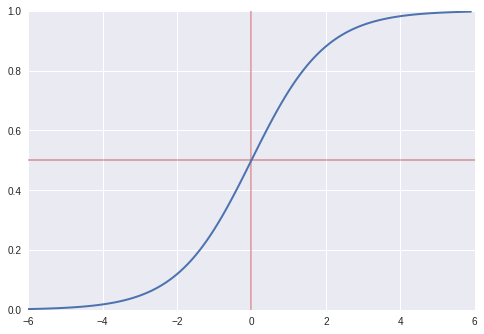

In [4]:
x = list(np.arange(-6.0, 6.0, 0.1))
y = []
for i in x:
  y_i = sigmoid(i)
  y.append(y_i)
  
xmin=-6
xmax = 6
ymin = 0
ymax = 1.0
axis = [xmin, xmax, ymin, ymax]
plt.axhline(y=0.5, color='C2', alpha=0.5)
plt.axvline(x=0, color='C2', alpha=0.5)
plt.axis(axis)
plt.plot(x, y, linewidth=2.0)

### Create an inut data matrix as numpy array:
- Matrix with n number of dimensions.

In [0]:
x = np.asarray([[0,0],
                [0,1],
                [1,0],
                [1,1]])

In [6]:
print (x.shape)

(4, 2)


In [7]:
x.shape[1]

2

In [8]:
x.shape[0]

4

### Define the output data matrix as numpy array:

In [0]:
y = np.asarray([[0],
                [1],
                [1],
                [0]])

### Create a random number seed:

- Random number seeding is useful for producing reproducible results.

In [0]:
seed = 1
np.random.seed(seed)

### Create a synapse matrix:

- A function applied to the syanpses.
- For the first synapse, weights matrix of shape: input_shape_1 x input_shape_2 is created.
- For the second synapse, weights matrix of shape: input_shape_2 x output_dim is created.
-  This function also introduces the first hyper-parameter in neural network tuning called 'bias_val', which is the bias value for the synaptic function.

In [0]:
bias_val = 1

output_dim = 1

input_shape_1 = x.shape[1]
input_shape_2 = x.shape[0]

synapse_0 = 2*np.random.random((input_shape_1, input_shape_2)) - bias_val
synapse_1 = 2*np.random.random((input_shape_2, output_dim)) - bias_val

loss_col = []

### Training the simple XOR gate neural network:

- Note: There is no function that defines a neuron! In practice neuron is just an abstract concept to understand the probability function.
- Continuously feeding the data throught the neural network.
- Updating the weights of the network through backpropagation.
- During the training the model becomes better and better in predicting the output values.
- The layers are just a matrix multiplication functions that applies the sigmoid function to the synapse matrix and the corresponding layer.
- Backpropagation portion of the training the machine learning portion of this code.
- Backpropagation function reduces the prediction errors during each training step.
- Synapses and weights are synonymous.

In [12]:
training_steps = 60000
update_freq = 10

input_data = x
output_data = y

for t in range(training_steps):
  # Creating the layers of the neural network:
  layer_0 = input_data
  layer_1 = sigmoid(np.dot(layer_0, synapse_0))
  layer_2 = sigmoid(np.dot(layer_1, synapse_1))
  
  # Backpropagation:
  output_error = output_data - layer_2
  loss_col.append(np.mean(np.abs(output_error)))
  if ((t*update_freq) % training_steps == 0):
    print ('Training step :' + str(t))
    print ('Prediction error during training :' + str(np.mean(np.abs(output_error))))
    
  # Layer-wsie delta function:
  layer_2_delta = output_error*sigmoid(layer_2, derivative = True)  
  layer_1_error = layer_2_delta.dot(synapse_1.T) # Matrix multiplication of the layer 2 delta with the transpose of the first synapse function.  
  layer_1_delta = layer_1_error*sigmoid(layer_1, derivative = True)
  
  # Updating synapses or weights:
  synapse_1 += layer_1.T.dot(layer_2_delta)
  synapse_0 += layer_0.T.dot(layer_1_delta)

print ('Training completed ...')
print ('Predictions :' + str (layer_2))

Training step :0
Prediction error during training :0.4995289647766772
Training step :6000
Prediction error during training :0.025576441334255847
Training step :12000
Prediction error during training :0.017045797757781606
Training step :18000
Prediction error during training :0.01347274355066992
Training step :24000
Prediction error during training :0.011405145084009088
Training step :30000
Prediction error during training :0.01002768024223632
Training step :36000
Prediction error during training :0.009032361055112468
Training step :42000
Prediction error during training :0.00827350667080667
Training step :48000
Prediction error during training :0.007672255462110679
Training step :54000
Prediction error during training :0.007181846873679413
Training completed ...
Predictions :[[0.00802491]
 [0.99405998]
 [0.99281435]
 [0.00594029]]


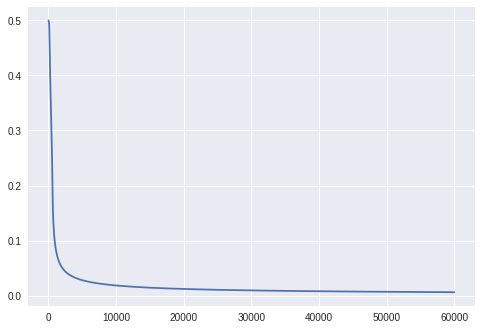

In [13]:
plt.plot(loss_col)
plt.show()

## Part 01b -- Neural network based XOR gate using rectified linear units activation function:

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Plotting the rectified linear units (ReLU) activation function:

In [0]:
def ReLU(x, h = None, derivative=False):
  if derivative:
    return x[h < 0]
  x_relu = np.maximum(x, 0)
  return x_relu

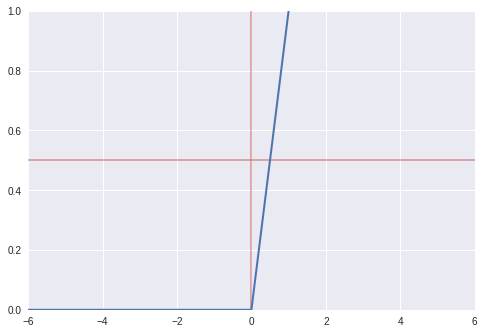

In [16]:
x = list(np.arange(-6.0, 6.0, 0.1))
y = []
for i in x:
  y_i = ReLU(i)
  y.append(y_i)
  
xmin=-6
xmax = 6
ymin = 0
ymax = 1
axis = [xmin, xmax, ymin, ymax]
plt.axhline(y=0.5, color='C2', alpha=0.5)
plt.axvline(x=0, color='C2', alpha=0.5)
plt.axis(axis)
plt.plot(x, y, linewidth=2.0)

In [0]:
# Create random input and output data
x = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
y = np.array([[0], 
              [1], 
              [1], 
              [0]])

In [0]:
# N is batch size(sample size); D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = x.shape[0], x.shape[1], 30, 1

In [0]:
# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

In [0]:
learning_rate = 0.002
update_freq = 10
training_steps = 200

loss_col = []

In [21]:
for t in range(training_steps):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)  # using ReLU as activate function
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum() # loss function
    loss_col.append(loss)
    if ((t*update_freq) % training_steps ==0):
      print ('Training step :' + str(t))
      print ('Loss function during training :' + str(loss))

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y) # the last layer's error
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T) # the second layer's error 
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0  # the derivate of ReLU
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
print ('Training completed ...')
print ('Predictions :' + str (y_pred))

Training step :0
Loss function during training :81.19873828427632
Training step :20
Loss function during training :1.2787828413353535
Training step :40
Loss function during training :0.5151907507910576
Training step :60
Loss function during training :0.3277418254307022
Training step :80
Loss function during training :0.22746315785763827
Training step :100
Loss function during training :0.15765559984557964
Training step :120
Loss function during training :0.10878397878027862
Training step :140
Loss function during training :0.07472981126028659
Training step :160
Loss function during training :0.05114949637963995
Training step :180
Loss function during training :0.034894739820221655
Training completed ...
Predictions :[[0.        ]
 [0.9225495 ]
 [0.90305102]
 [0.09378245]]


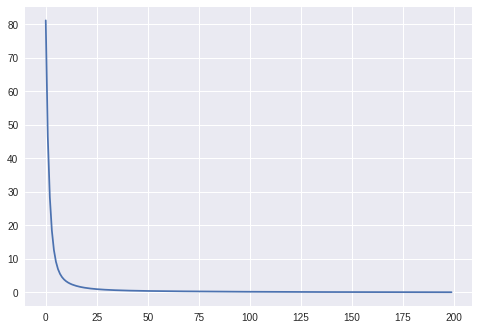

In [22]:
plt.plot(loss_col)
plt.show()

## Part 02 -- [Build a more complex neural network classifier using numpy](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/):

### Importing dependent libraries:

In [0]:
import matplotlib.pyplot as plt # pip3 install matplotlib
import numpy as np # pip3 install numpy
import sklearn # pip3 install scikit-learn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

### Plotting hyperbolic tan (tanh) activation function:

In [0]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)

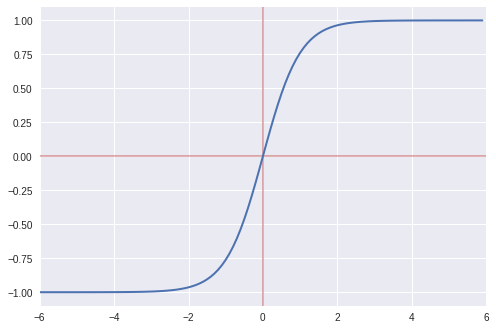

In [25]:
x = list(np.arange(-6.0, 6.0, 0.1))
y = []
for i in x:
  y_i = tanh(i)
  y.append(y_i)
  
xmin=-6
xmax = 6
ymin = -1.1
ymax = 1.1
axis = [xmin, xmax, ymin, ymax]
plt.axhline(y=0, color='C2', alpha=0.5)
plt.axvline(x=0, color='C2', alpha=0.5)
plt.axis(axis)
plt.plot(x, y, linewidth=2.0)

### Display plots inline and change default figure size:

In [0]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### Generate a dataset and create a plot:

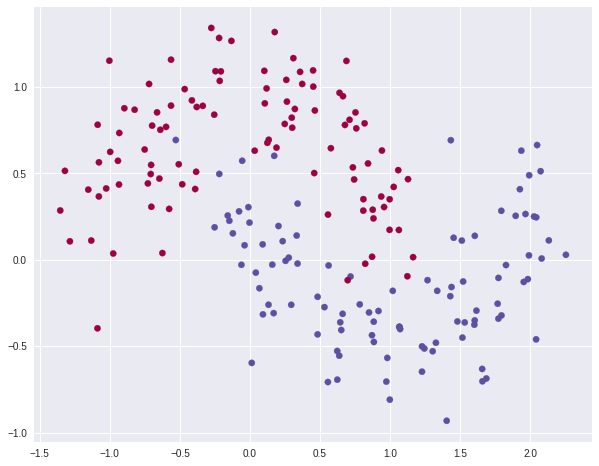

In [27]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

### Train the logistic regression classifier:

The classification problem can be summarized as creating a boundary between the red and the blue dots.

In [28]:
linear_classifier = sklearn.linear_model.LogisticRegressionCV()
linear_classifier.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Visualize the logistic regression classifier output:

In [0]:
def plot_decision_boundary(prediction_function):
  # Setting minimum and maximum values for giving the plot function some padding
  x_min, x_max = X[:, 0].min() - .5, \
                 X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, \
                 X[:, 1].max() + .5
  h = 0.01
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), \
                       np.arange(y_min, y_max, h))
  # Predict the function value for the whole grid
  Z = prediction_function(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # Plotting the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spectral)

### Plotting the decision boundary:

Text(0.5,1,'Logistic Regression')

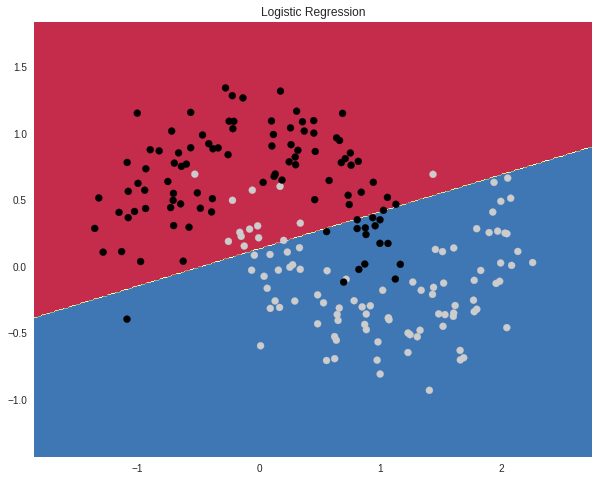

In [30]:
plot_decision_boundary(lambda x: linear_classifier.predict(x))
plt.title("Logistic Regression")

### Create a neural network:

In [0]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

### Gradient descent parameters:

In [0]:
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

### Compute loss function on the dataset:

Calculating predictions using forward propagation

In [0]:
def loss_function(model):
  W1, b1, W2, b2 = model['W1'], \
                   model['b1'], \
                   model['W2'], \
                   model['b2']
  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probabilities = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  # Calculating the loss function:
  corect_logprobs = -np.log(probabilities[range(num_examples), y])
  data_loss = np.sum(corect_logprobs)
  # Adding the regulatization term to the loss function
  data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
  return 1./num_examples * data_loss

### Function that predicts the output of either 0 or 1:

In [0]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], \
                     model['b1'], \
                     model['W2'], \
                     model['b2']
    # Design a network with forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


### This function learns parameters for the neural network and returns the model:
- nn_hdim: Number of nodes in the hidden layer
- num_passes: Number of passes through the training data for gradient descent
- print_loss: If True, print the loss every 1000 iterations

In [0]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, loss_function(model)))
    
    return model

### Build a model with 50-dimensional hidden layer:

In [36]:
model = build_model(50, print_loss=True)

Loss after iteration 0: 1.056085
Loss after iteration 1000: 0.056989
Loss after iteration 2000: 0.049367
Loss after iteration 3000: 0.042195
Loss after iteration 4000: 0.037284
Loss after iteration 5000: 0.034583
Loss after iteration 6000: 0.033298
Loss after iteration 7000: 0.032611
Loss after iteration 8000: 0.032192
Loss after iteration 9000: 0.031917
Loss after iteration 10000: 0.031724
Loss after iteration 11000: 0.031581
Loss after iteration 12000: 0.031468
Loss after iteration 13000: 0.031375
Loss after iteration 14000: 0.031296
Loss after iteration 15000: 0.031227
Loss after iteration 16000: 0.031167
Loss after iteration 17000: 0.031115
Loss after iteration 18000: 0.031069
Loss after iteration 19000: 0.031028


### Plot the decision boundary:

Text(0.5,1,'Decision Boundary for hidden layer size  50')

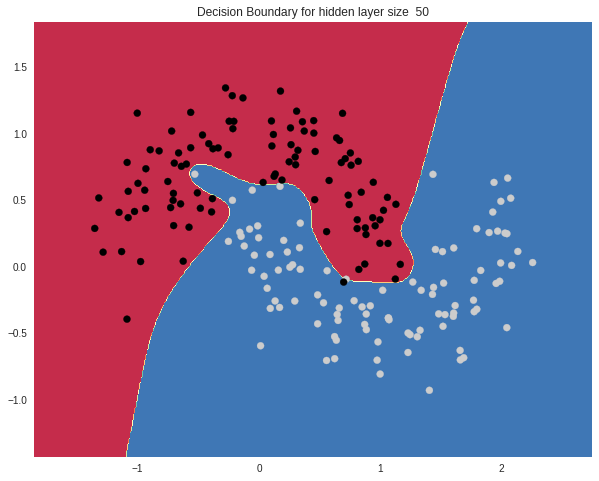

In [37]:
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size  50")

### Visualizing the hidden layers with varying sizes:

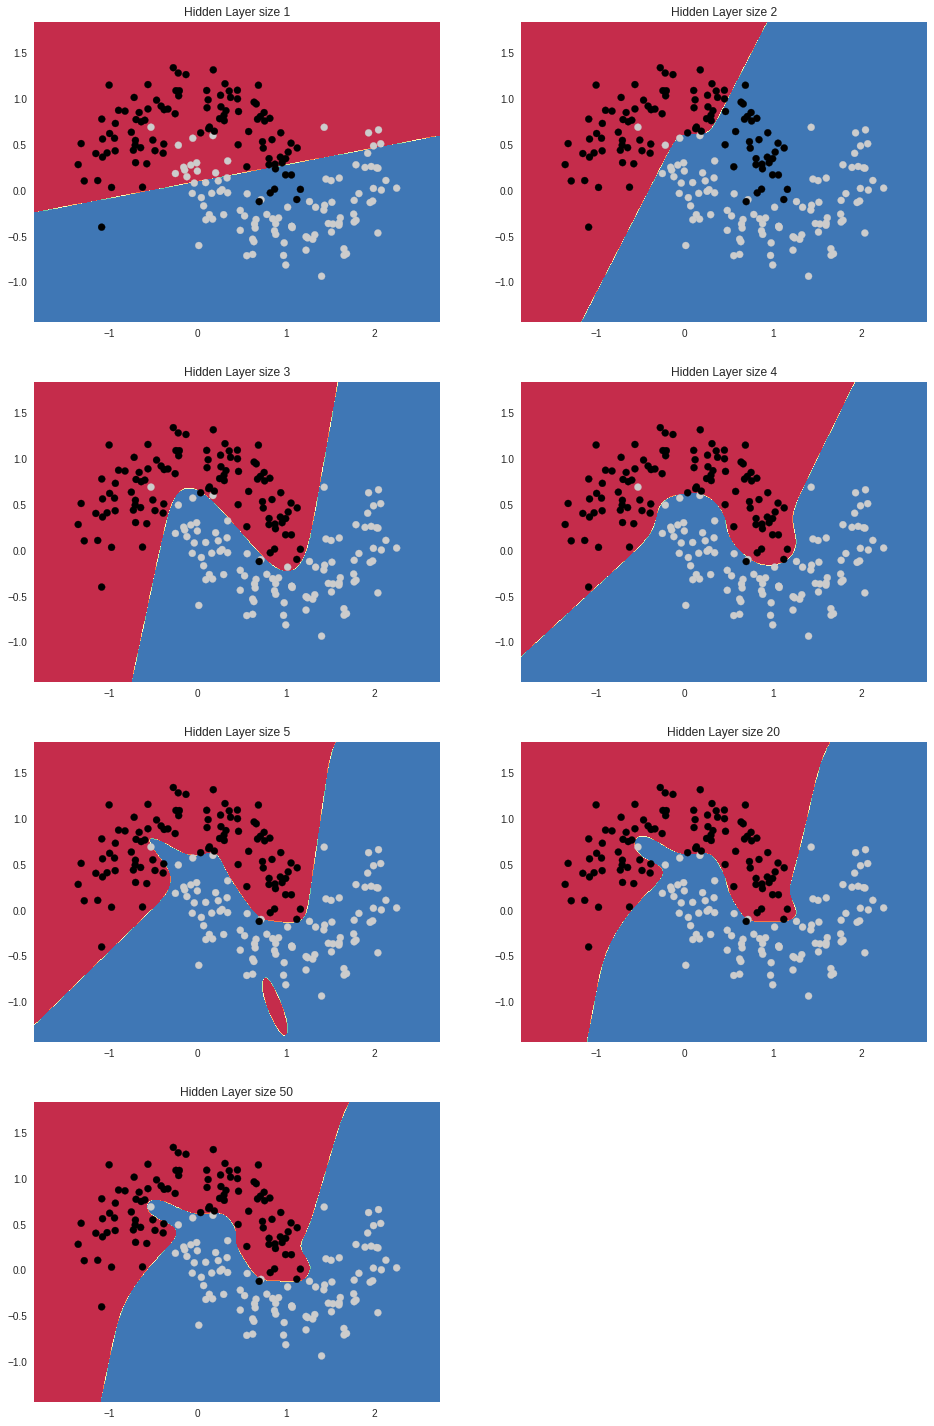

In [38]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

## Part 03 -- Example illustrating the importance of[ learning rate](http://users.ics.aalto.fi/jhollmen/dippa/node22.html) in hyper-parameter tuning:

- Learning rate is a decreasing function of time. 
- Two forms that are commonly used are:
    * 1) a linear function of time 
    * 2) a function that is inversely proportional to the time t

### Create a noisier, more complex dataset:

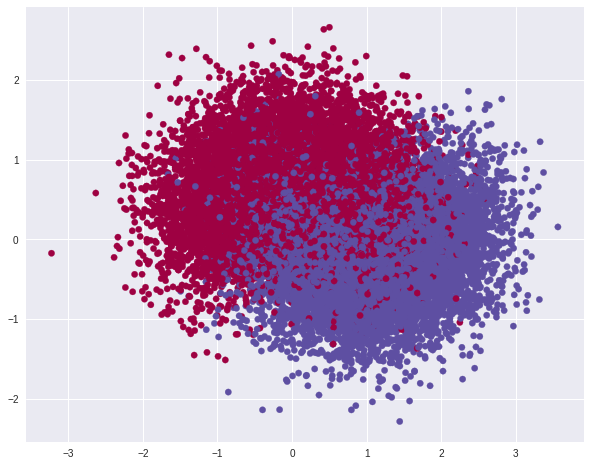

In [39]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(20000, noise=0.5)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [40]:
linear_classifier = sklearn.linear_model.LogisticRegressionCV()
linear_classifier.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Text(0.5,1,'Logistic Regression')

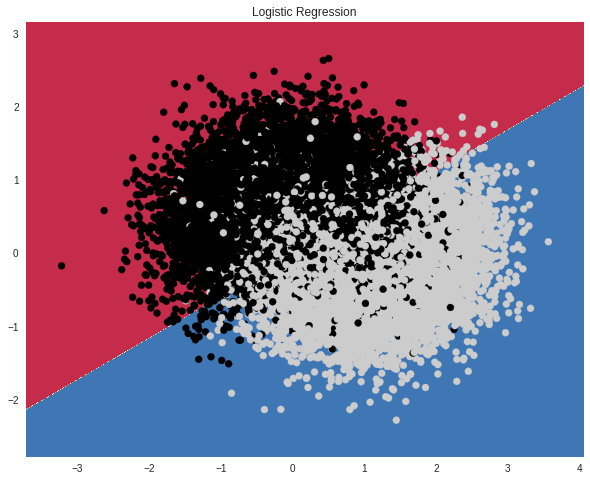

In [41]:
plot_decision_boundary(lambda x: linear_classifier.predict(x))
plt.title("Logistic Regression")

In [0]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

In [0]:
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [44]:
model = build_model(50, print_loss=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


Loss after iteration 0: inf
Loss after iteration 1000: nan
Loss after iteration 2000: nan
Loss after iteration 3000: nan
Loss after iteration 4000: nan
Loss after iteration 5000: nan
Loss after iteration 6000: nan
Loss after iteration 7000: nan
Loss after iteration 8000: nan
Loss after iteration 9000: nan
Loss after iteration 10000: nan
Loss after iteration 11000: nan
Loss after iteration 12000: nan
Loss after iteration 13000: nan
Loss after iteration 14000: nan
Loss after iteration 15000: nan
Loss after iteration 16000: nan
Loss after iteration 17000: nan
Loss after iteration 18000: nan
Loss after iteration 19000: nan


### Plotting output of the model that failed to learn, given a set of hyper-parameters:

Text(0.5,1,'Decision Boundary for hidden layer size  50')

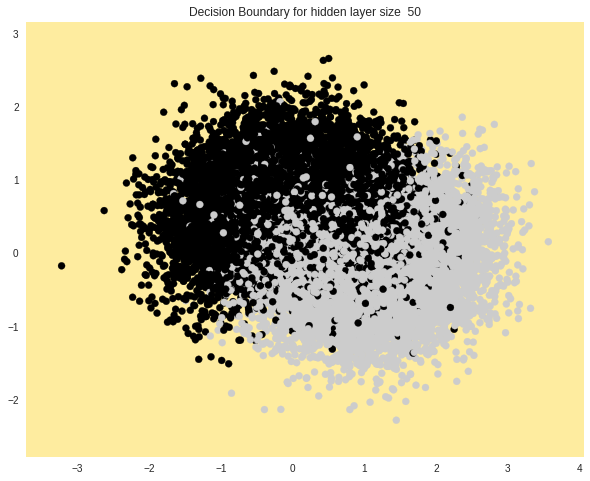

In [45]:
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size  50")

### Adjusting the learning rate such that the neural network re-starts learning:

In [0]:
epsilon = 1e-6 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [0]:
model = build_model(50, print_loss=True)

Loss after iteration 0: 0.530274
Loss after iteration 1000: 0.426027
Loss after iteration 2000: 0.420427
Loss after iteration 3000: 0.415740
Loss after iteration 4000: 0.411573
Loss after iteration 5000: 0.408116
Loss after iteration 6000: 0.405443
Loss after iteration 7000: 0.403484
Loss after iteration 8000: 0.402098
Loss after iteration 9000: 0.401138
Loss after iteration 10000: 0.400476
Loss after iteration 11000: 0.400015
Loss after iteration 12000: 0.399687


### Plotting the decision boundary layer generated by an improved neural network model:

In [0]:
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size  50")

## Part 04 -- Building a neural network using [tensorflow](https://www.tensorflow.org/):

- A neural network that predicts the y value given an x value.
- Implemented using tensorflow, an open-source deep-learning library.

### Import dependent libraries:

In [0]:
import tensorflow as tf
import numpy as np

### Create a synthetic dataset for training and generating predictions:

In [0]:
x_data = np.float32(np.random.rand(2,500))
y_data = np.dot([0.5, 0.7], x_data) + 0.6

- Variable objects store tensors in tensorflow.
- Tensorflow considers all input data tensors.
- Tensors are 3 dimensional matrices.

### Constructing a linear model:

In [0]:
bias = tf.Variable(tf.zeros([1]))
synapses = tf.Variable(tf.random_uniform([1, 2], -1, 1)) 

In [0]:
y = tf.matmul(synapses, x_data) + bias

### Gradient descent optimizer:

- Imagine the valley with a ball.
- The goal of the optimizer is to localize the ball to the lowest point in the valley.
- Loss function will be reduced over the training.
- Mean squared error as the loss function.

In [0]:
lr = 0.01

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(lr)

### Training function:

- In tensorflow the computation is wrapped inside a graph.
- Tensorflow makes it easier to visualize the training sessions.

In [0]:
train = optimizer.minimize(loss)

### Initialize the variables for the computational graph:

In [0]:
init = tf.global_variables_initializer()

### Launching the tensorflow computational graph:

In [0]:
sess = tf.Session()
sess.run(init)

### Training the model:

In [0]:
training_steps = 60000

for step in range (0, training_steps):
  sess.run(train)
  if step % 1000 == 0:
    print ('Current training session: ' + str(step) + str(sess.run(synapses))+ str(sess.run(bias)))

## Extra credit --[ Activation functions in numpy](https://codereview.stackexchange.com/questions/132023/different-neural-network-activation-functions-and-gradient-descent):

In [0]:
import numpy as np

def sigmoid(x, derivative=False):
    if (derivative == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 1
                else:
                    x[i][k] = 0
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                pass  # do nothing since it would be effectively replacing x with x
            else:
                x[i][k] = 0
    return x

def arctan(x, derivative=False):
    if (derivative == True):
        return (np.cos(x) ** 2)
    return np.arctan(x)

def step(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 0
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                x[i][k] = 1
            else:
                x[i][k] = 0
    return x

def squash(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(0, len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = (x[i][k]) / (1 + x[i][k])
                else:
                    x[i][k] = (x[i][k]) / (1 - x[i][k])
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            x[i][k] = (x[i][k]) / (1 + abs(x[i][k]))
    return x

def gaussian(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(0, len(x[i])):
                x[i][k] = -2* x[i][k] * np.exp(-x[i][k] ** 2)
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            x[i][k] = np.exp(-x[i][k] ** 2)
    return x